# Selena Gomez Song Data Analysis

This notebook provides data analysis and visualizations of Selena Gomez's songs, including release trends, album statistics, and lyrical insights.

TEAM NAME:DATA DETECTIVES



TEAM MEMBERS:
PRANAV KUMAR BANDARAM :pranav.bandaram@adypu.edu.in

SIDDU HAMIGI :siddu.hamigi@adypu.edu.in

SURAJ KEWAT:suraj.kewat@adypu.edu.in

ADITYA RAJ SRIVASTAVA:adityaraj.srivastava@adypu.edu.in



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import missingno as msno

# Load the dataset
df = pd.read_csv('SelenaGomez.csv')
df.head()

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Selena Gomez,Lose You To Love Me,Rare (Target Exclusive),2019.0,2019-10-23,you promised the world and i fell for it i put...
1,1,Selena Gomez,Back to You,Rare (Target Exclusive),2018.0,2018-05-10,took you like a shot thought that i could chas...
2,2,Selena Gomez,Fetish,Rare (Target Exclusive),2017.0,2017-07-13,selena gomez take it or leave it baby take it ...
3,3,Selena Gomez,Bad Liar,Rare (Target Exclusive),2017.0,2017-05-18,i was walking down the street the other day tr...
4,4,Selena Gomez,Look At Her Now,Rare (Target Exclusive),2019.0,2019-10-24,yeah they fell in love one summer a little t...


## Data Cleaning
Check for missing values and basic corrections.

In [4]:
# Drop unnamed index column if exists
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Basic missing data summary
df.isnull().sum()

Artist     0
Title      0
Album     53
Year      44
Date      44
Lyric      1
dtype: int64

## Missing Data Visualization

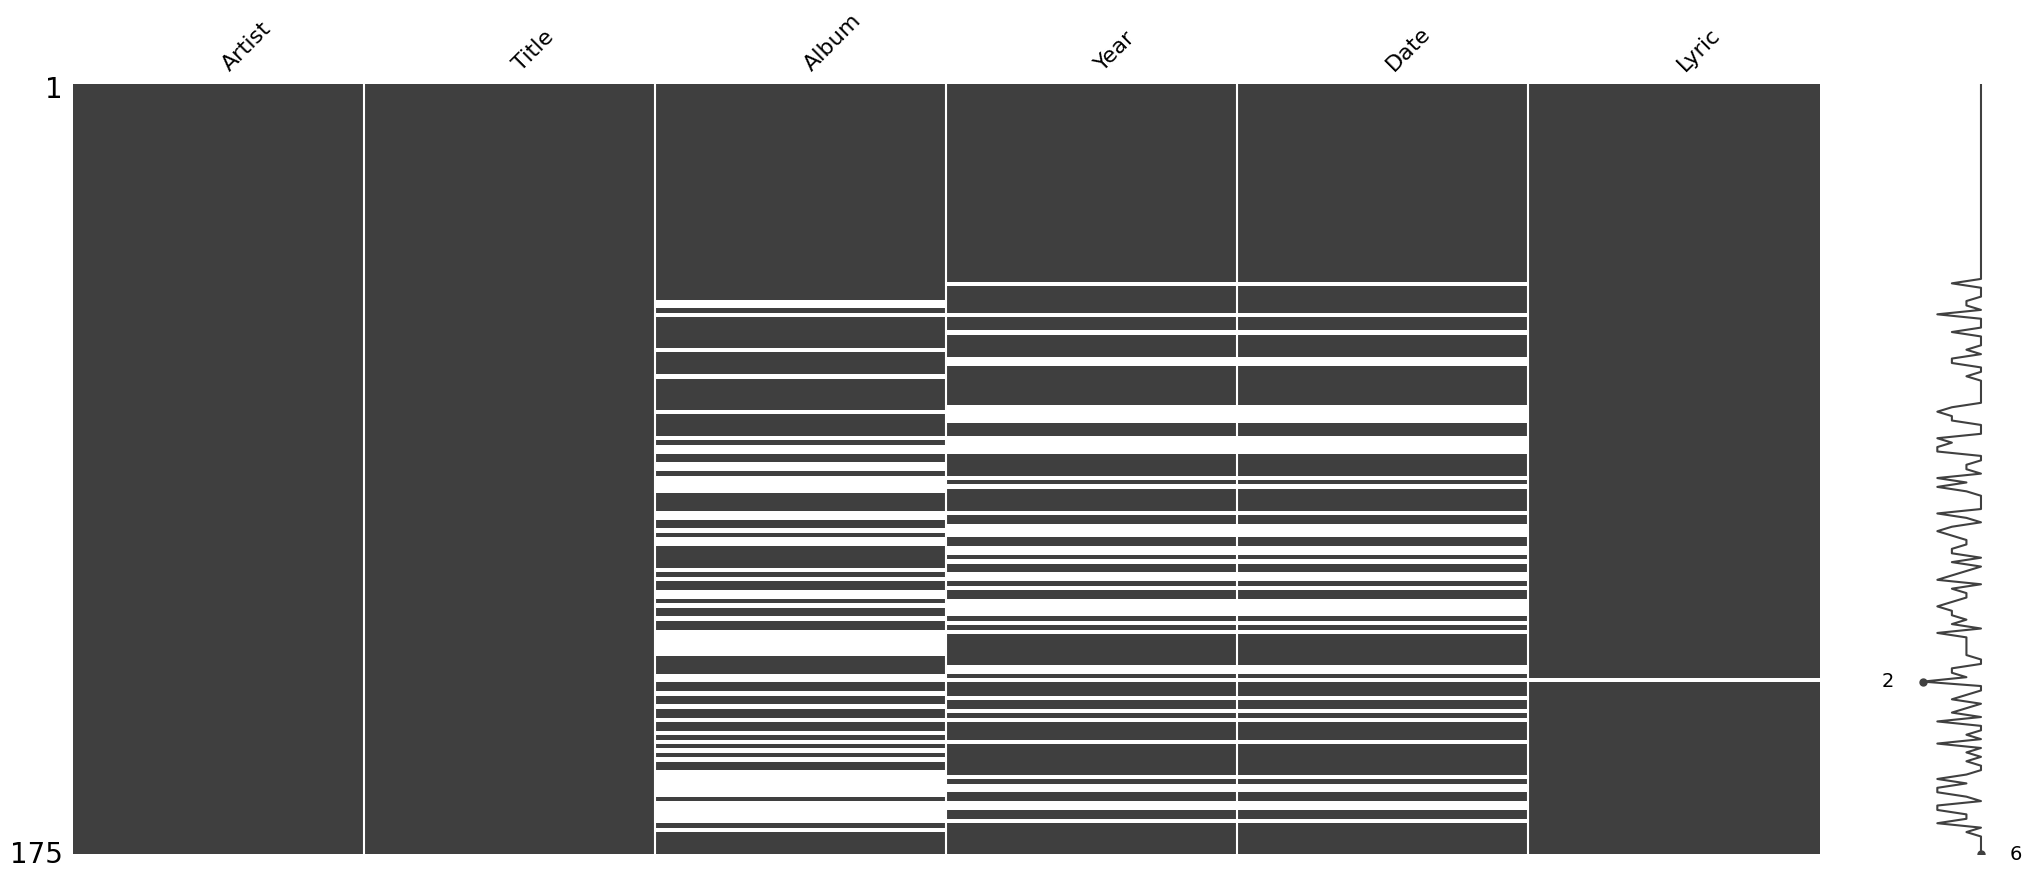

In [5]:
msno.matrix(df)
plt.show()

## Songs Released Per Year

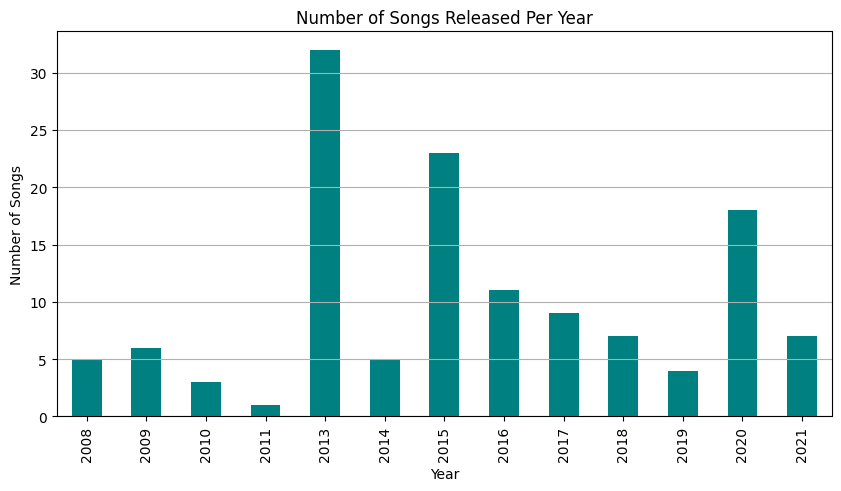

In [6]:
songs_per_year = df['Year'].dropna().astype(int).value_counts().sort_index()
songs_per_year.plot(kind='bar', figsize=(10,5), color='teal')
plt.title('Number of Songs Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(axis='y')
plt.show()

## Album-wise Song Distribution

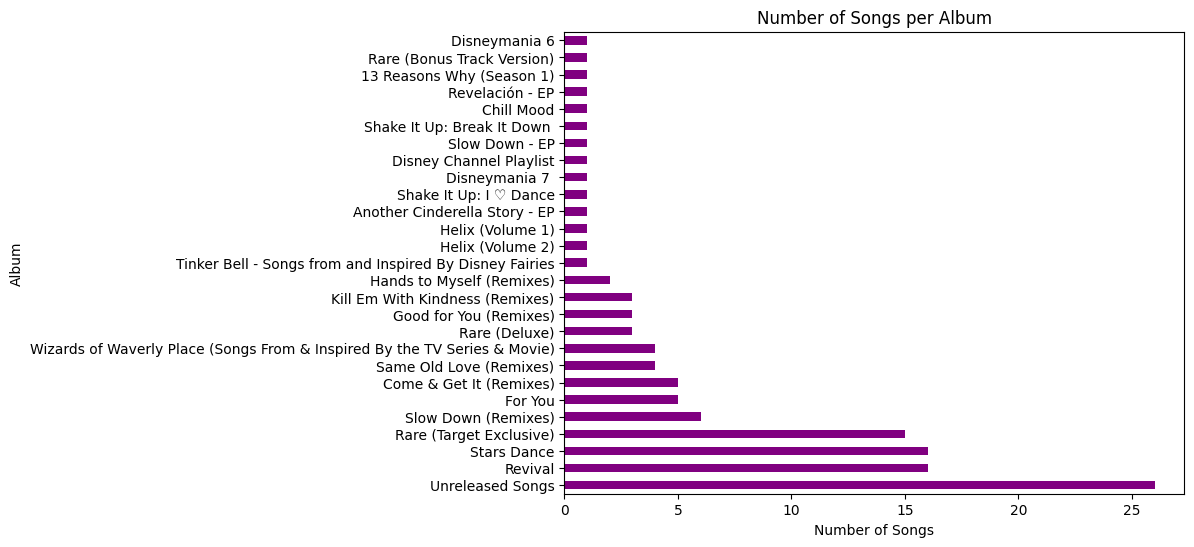

In [7]:
df['Album'].value_counts().plot(kind='barh', figsize=(8,6), color='purple')
plt.title('Number of Songs per Album')
plt.xlabel('Number of Songs')
plt.ylabel('Album')
plt.show()

## Word Cloud of Lyrics

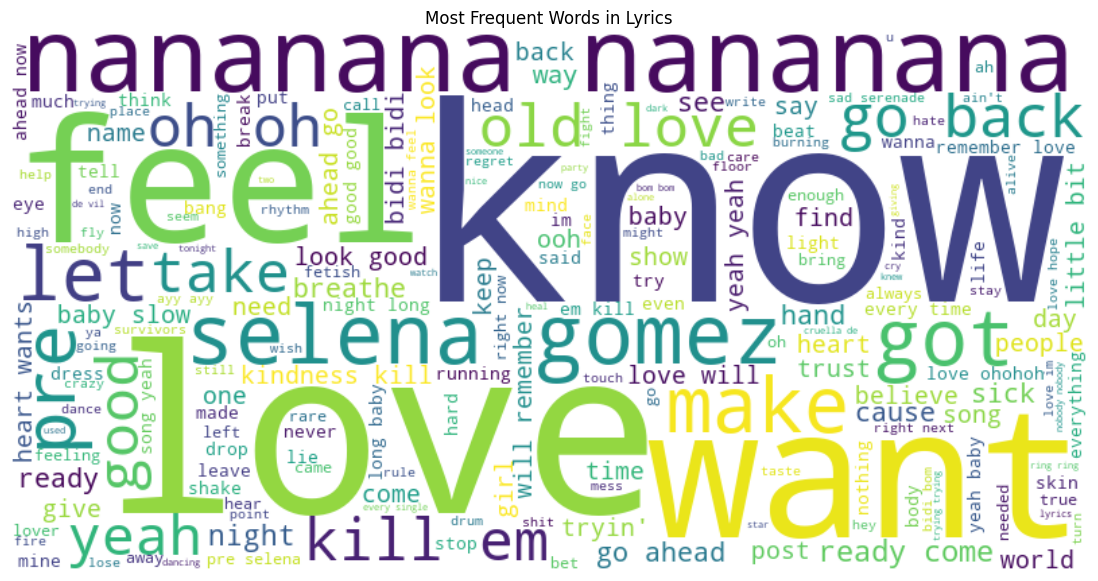

In [8]:
text = ' '.join(df['Lyric'].dropna()).lower()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Lyrics')
plt.show()

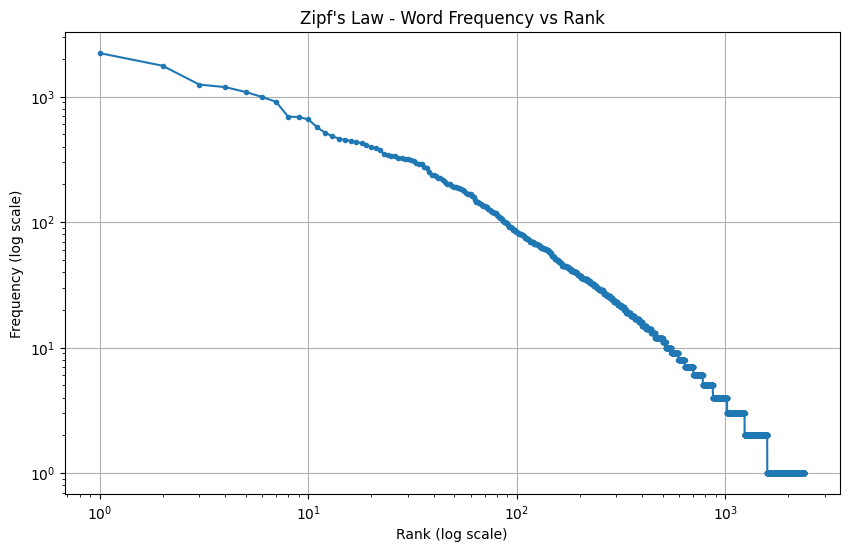

In [9]:
from collections import Counter
import numpy as np

# Combine all lyrics into a single string and split into words
text = ' '.join(df['Lyric'].dropna()).lower()
words = text.split()

# Count word frequencies
word_counts = Counter(words)
most_common = word_counts.most_common()

# Prepare data for Zipf plot
ranks = np.arange(1, len(most_common) + 1)
frequencies = np.array([freq for word, freq in most_common])

# Plot Zipf's Law
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker=".")
plt.title("Zipf's Law - Word Frequency vs Rank")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.grid(True)
plt.show()


In [ ]:
TEAM MEMBERS CONTRIBUTIONS:

PRANAV KUMAR BANDARAM:Visualization and graphical representation
SIDDU HAMIGI:Dataset preprocessing and Python coding
SURAJ KEWAT:Statistical analysis and Zipf¾s law application
ADITYA RAJ SRIVASTAVA:Documentation and presentation preparation



